# Import relevant  modules for file extraction

In [2]:
import pandas as pd

# Extract data into Data Frame

In [3]:
orders_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\orders.csv')
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
department_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\departments.csv')
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
product_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\products.csv')
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Understand the Orders data. 

In [6]:
#count user_ids for different evaluation set
count_eval_set = orders_df.groupby('eval_set').user_id.nunique()
count_eval_set

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [7]:
#count order_ids for different evaluation set
count_eval_set = orders_df.groupby('eval_set').order_id.nunique()
count_eval_set

eval_set
prior    3214874
test       75000
train     131209
Name: order_id, dtype: int64

In [8]:
#count order_ids based on users
count_users = orders_df.groupby('user_id').count()['order_id']
count_users.sort_values(ascending = False).head()

user_id
26086     100
120897    100
122476    100
31118     100
1868      100
Name: order_id, dtype: int64

# Clean up Department and Product Data

In [9]:
#remove unwanted any extra blank spaces in the department field
department_df['department'] = department_df['department'].str.strip()

In [10]:
#remove any Null values in the department label
department_df.dropna(axis=0,how='any',subset=['department']).head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
#remove unwanted any extra blank spaces in the product field
product_df['product_name'] = product_df['product_name'].str.strip()

In [12]:
#remove any Null values in the product label
product_df.dropna(axis=0,how='any',subset=['product_name']).head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Checking if any Department or Product have any Null values

In [14]:
product_df[product_df['product_name'].isnull()].head()

,product_id,product_name,aisle_id,department_id


In [15]:
department_df[department_df['department'].isnull()]

,department_id,department


# Getting all Order & Product details

In [16]:
order_product_prior_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\order_products__prior.csv')

In [17]:
order_product_train_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\order_products__train.csv')


In [18]:
aisles_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\aisles.csv')


### This ends the initial exercise with the Capstone Project.

# Starting from below we will start Statistical Analysis on the Capstone Project

In [19]:
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [21]:
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [22]:
order_product_train_df['reordered'].unique()

array([1, 0], dtype=int64)

In [23]:
df = order_product_train_df[order_product_train_df['order_id']==98]
df['product_id'].unique().shape

(49,)

In [24]:
order_product_join_train = pd.merge(orders_df,order_product_train_df,how='inner',on='order_id')
order_product_join_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [25]:
order_product = pd.merge(order_product_join_train,product_df,how='inner',on='product_id')
order_product_department = pd.merge(order_product,department_df,how='inner',on='department_id')
order_product_department_aisle = pd.merge(order_product_department,aisles_df,how='inner',on='aisle_id')
order_product_department_aisle.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,soft drinks
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,soft drinks
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,soft drinks
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,soft drinks


In [26]:
analysis_df = order_product_department_aisle[['user_id','order_id','product_name','department','aisle','order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered']]


In [58]:
df = analysis_df.groupby('department').count()['order_id'].reset_index()
df

,department,order_id
0,alcohol,5598
1,babies,14941
2,bakery,48394
3,beverages,114046
4,breakfast,29500
5,bulk,1359
6,canned goods,46799
7,dairy eggs,217051
8,deli,44291
9,dry goods pasta,38713


In [29]:
import numpy as np

In [30]:
import matplotlib.pyplot as plt

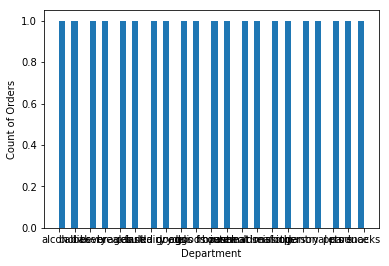

In [63]:
plt.hist(df['department'],bins = 50)
plt.xlabel('Department')
plt.ylabel('Count of Orders')
plt.show()

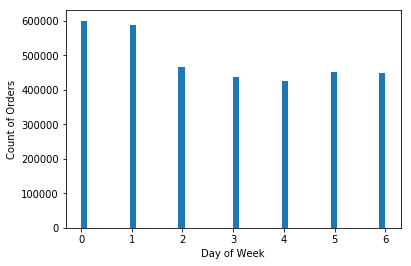

In [31]:
plt.hist(orders_df['order_dow'],bins = 50)
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')
plt.show()

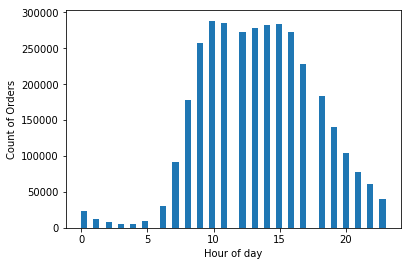

In [35]:
plt.hist(orders_df['order_hour_of_day'],bins = 50)
plt.xlabel('Hour of day')
plt.ylabel('Count of Orders')
plt.show()

In [61]:
order_dow_hour_of_day = orders_df.groupby(['order_dow','order_hour_of_day']).count()['order_id'].reset_index()


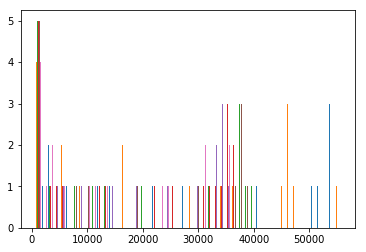

In [53]:
plt.hist(order_dow_hour_of_day,bins=50)
plt.show()